In [1]:
#importing packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation
from scipy.misc import derivative
import numpy as np
import astropy.units as u
from astropy.table import Table
from astropy import constants as const
import pandas as pd
import sympy as sp
import decimal
import seaborn as sns
decimal.getcontext().prec = 100
import scipy as sci
from scipy import integrate

In [2]:
df = pd.read_csv('physRev187_1767.csv')
df

,r,phi
0,0.00692,0.08329
1,1.04637,0.08214
2,2.08581,0.07883
3,3.12526,0.07371
4,4.16470,0.06724
5,5.20415,0.05997
6,6.24359,0.05240
7,7.28304,0.04497
8,8.32248,0.03798
9,9.36193,0.03164


<AxesSubplot:xlabel='r'>

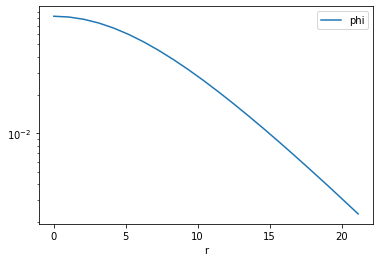

In [3]:
df.plot(x = 'r', y = 'phi', logy= True)
#plt.ylim(1e-3, 1)
#plt.xlim(1e-3, 1e2)

In [4]:
m = 1e-12 * u.eV
M = 1.3e12 * const.M_sun
df['R'] = df['r'] * ((2 * const.G * m**2 * M)/((const.c**2 * const.hbar)**2)).cgs.value
df['rho'] = df['phi'] * df['phi'] * (np.sqrt(2 * np.pi * M.cgs.value) * ((2 * const.G * m**2 * M / (const.c**(2) * const.hbar)**2)**(1.5)).cgs.value)**2 / const.M_sun.cgs.value

In [5]:
((2 * const.G * m**2 * M)/((const.c**(2) * const.hbar)**2)).cgs

<Quantity 985.9857438 1 / cm>

In [6]:
(np.sqrt(2 * np.pi * M.cgs)* ((2 * const.G * m**2 * M / (const.c**2 * const.hbar)**2)**(1.5)).cgs)**2/ const.M_sun.cgs.value

<Quantity 7.82951981e+21 g / cm3>

In [7]:
df

,r,phi,R,rho
0,0.00692,0.08329,6.823021,5.431513e+19
1,1.04637,0.08214,1031.705903,5.282561e+19
2,2.08581,0.07883,2056.578924,4.865396e+19
3,3.12526,0.07371,3081.461806,4.253907e+19
4,4.16470,0.06724,4106.334827,3.539896e+19
5,5.20415,0.05997,5131.217709,2.815809e+19
6,6.24359,0.05240,6156.090730,2.149798e+19
7,7.28304,0.04497,7180.973612,1.583364e+19
8,8.32248,0.03798,8205.846633,1.129393e+19
9,9.36193,0.03164,9230.729514,7.838051e+18


In [8]:
df.to_csv('dataFrame.csv')

In [11]:
df2 = pd.read_csv('dataFrame2.csv')
df2

,r,phi,R,rho
0,0.00692,0.08329,6.823021,5.430000e+19
1,1.04637,0.08214,1031.705903,5.280000e+19
2,2.08581,0.07883,2056.578924,4.870000e+19
3,3.12526,0.07371,3081.461806,4.250000e+19
4,4.16470,0.06724,4106.334827,3.540000e+19
...,...,...,...,...
94,NaN,NaN,93846.006390,1.500000e-03
95,NaN,NaN,94846.006390,1.420000e-03
96,NaN,NaN,95846.006390,1.340000e-03
97,NaN,NaN,96846.006390,1.270000e-03


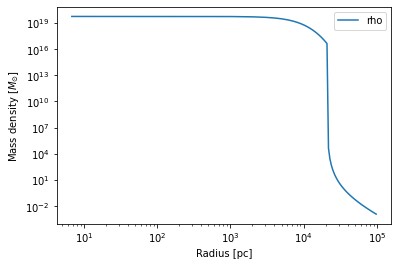

In [12]:
df2.plot(x = 'R', y = 'rho')
plt.ylabel(r'Mass density [$M_{\odot}$]')
plt.xlabel(r'Radius [pc]')
plt.xscale('log')
plt.yscale('log')

<ipython-input-19-e9efc34d133c>:13: RuntimeWarning: divide by zero encountered in true_divide
  y = 6e11 / np.sqrt(x - 1e4)


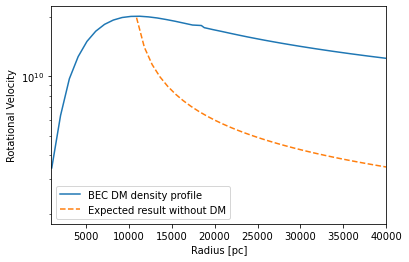

In [19]:
def Vrot(R):
    result = 4 * np.pi * const.G.cgs.value
    result /= df2['R'].iloc[R+2]
    Rlist = df2['R'].iloc[0:R+2]
    rholist = df2['rho'][0:R+2]
    integral = integrate.simpson(Rlist**2 * rholist, Rlist)
    return np.sqrt(result * integral)

rotVel = np.ndarray(len(df2['R']) - 2)
for i in range(len(df2['R']) - 2):
    rotVel[i] = Vrot(i)
x = np.linspace(1e4, 1e5, 100)
y = 6e11 / np.sqrt(x - 1e4)

plt.plot(df2['R'][1:len(df2['R']) - 1], rotVel, label = 'BEC DM density profile')
plt.plot(x, y, label = 'Expected result without DM', linestyle = 'dashed')
plt.xlim(1e3, 4e4)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Radius [pc]')
plt.ylabel('Rotational Velocity')
plt.legend()

$$
{\df }
$$